<a href="https://colab.research.google.com/github/dibyanshujha12345/C-115-PROJECT/blob/main/C115PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import csv

df=pd.read_csv("escape_velocity.csv")

velocity_data=df["Velocity"].tolist()
escaped_data=df["Escaped"].tolist()

fig=px.scatter(x=velocity_data,y=escaped_data)
fig.show()



In [ ]:
import numpy as np

velocity_array=np.array(velocity_data)
escaped_array=np.array(escaped_data)



m,c=np.polyfit(velocity_array,escaped_array,1)
print(m,",",c)

y=[]

for x in velocity_array:
  y_value=m*x+c
  y.append(y_value)

fig=px.scatter(x=velocity_array,y=escaped_array)
fig.update_layout(shapes=[
                   dict(
                       type="line",
                       y0=min(y),y1=max(y),x0=min(velocity_array),x1=max(escaped_array)
                   )
])
fig.show()


0.070528883140827 , -0.28107925271413164


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



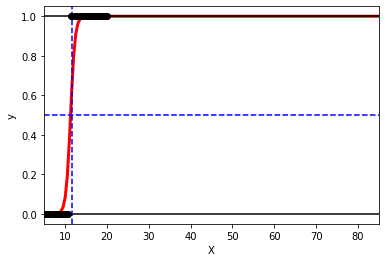

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(velocity_data,(len(escaped_data),1))
#  print(X)

Y=np.reshape(escaped_data,(len(escaped_data),1))

lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color='black', zorder=20)

def model(x):
  return 1/(1+np.exp(-x))


X_test=np.linspace(0,100,200)
chances=model(X_test*lr.coef_ + lr.intercept_ ).ravel()
plt.plot(X_test,chances,color='red',lineWidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')

plt.axvline(x=X_test[23],color='b',linestyle='--')
plt.ylabel('y')
plt.xlabel('X')
plt.xlim(5,85)
plt.show()





In [ ]:
accept_mark=float(input("please Enter your Velocity"))
chances=model(accept_mark*lr.coef_ + lr.intercept_ ).ravel()
if(chances<=0.01):
  print("will not get escaped")

elif(chances>=1):
  print(" will  get escaped")

elif(chances<=0.5):
  print(" will not get escaped")
else:
  print("may  get esacped")    